# techcrunch 사이트에서 기사 목록 읽기

In [1]:
import requests
import lxml.html

### 기사 목록 가져오기

In [2]:
url = 'https://techcrunch.com/startups/page/2/'

In [3]:
# 기사 제목에 해당하는 html 구조
# <div> <h2 class=""> <a href="">

In [7]:
def get_tc_list(page):
    """각 page에 있는 기사 제목을 가져온다"""
    url = 'https://techcrunch.com/startups/page/{}/'.format(page)  # URL 만들기
    res = requests.get(url)                # 기사 목록
    root = lxml.html.fromstring(res.text)  # HTML 파싱
    titles = root.cssselect('h2 a')        # 제목 가져오기
    # Generator
    for title in titles:
        yield title.text

In [8]:
# 1 page 기사 리스트
list(get_tc_list(1))

['83North closes $250M fourth fund focused on European, Israeli\xa0startups',
 'London-based Forward Partners closes new £60M fund to invest in startups at idea and Seed\xa0stage',
 'CheckRecipient, a London startup that uses machine learning to stop misaddressed emails, raises\xa0$2.7M',
 'Instacart VP of operations Mike Swartz has left the\xa0company',
 'High school junior launches TagDat, an emoji-based local reviews\xa0app',
 'How Winnipeg focused on local strengths to create a tech hub in central\xa0Canada',
 'LocusBots can now ‘talk’ to each other and collaborate in\xa0warehouses',
 'The TC Disrupt After Parties (and concert!) are going to be off the\xa0hook!',
 'TC is taking over Manhattan on\xa0Thursday!',
 'This new sentiment index aims to help founders time their\xa0fundraising',
 'Spotify trades free-tier album delays for smaller\xa0royalties',
 'Pluto AI raises $2.1 million to bring intelligence to water\xa0treatment',
 'Vimcar, a Berlin startup that offers hardware and an 

### TQDM
진행 막대(pregress bar)를 보여주는 라이브러리. conda install tqdm.

In [9]:
import tqdm

### 기사 수집

In [10]:
articles = []
# 30 page 까지
for page in tqdm.tqdm_notebook(range(1, 31)):  
    articles = articles + list(get_tc_list(page))

In [11]:
len(articles)

600

In [12]:
articles[0]

'83North closes $250M fourth fund focused on European, Israeli\xa0startups'

## TDM (Term Document Matrix)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer(max_features=2000, stop_words='english')  

# max_features : 최대 단어 갯수
# stop_words : 제외할 단어 목록 (english : a, the, of 등을 제외할 단어 내장)

In [36]:
tdm = cv.fit_transform(articles)   # make TDM
tdm

<600x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 4183 stored elements in Compressed Sparse Row format>

In [16]:
words = cv.get_feature_names()  # word list. 한 단어가 컬럼 하나.
words[100:130]

['acquires',
 'acquisition',
 'acquisitions',
 'action',
 'ad',
 'adam',
 'add',
 'additional',
 'addresses',
 'adds',
 'adelphic',
 'ads',
 'adsemble',
 'advertising',
 'aerial',
 'aes',
 'affordable',
 'africa',
 'agent',
 'aggregates',
 'aging',
 'agreed',
 'ai',
 'aiden',
 'aimed',
 'aiming',
 'aims',
 'air',
 'airbnb',
 'airlines']

In [17]:
count_mat = tdm.sum(axis=0)   # column별 합계. 즉, 단어별 사용 횟수
count_mat

matrix([[4, 2, 2, ..., 1, 1, 1]], dtype=int64)

In [18]:
import numpy

In [19]:
count = numpy.squeeze(numpy.asarray(count_mat))   # matrix --> array
count

array([4, 2, 2, ..., 1, 1, 1], dtype=int64)

In [20]:
word_count = list(zip(words, count))
word_count[100:130]

[('acquires', 22),
 ('acquisition', 3),
 ('acquisitions', 1),
 ('action', 1),
 ('ad', 7),
 ('adam', 1),
 ('add', 2),
 ('additional', 1),
 ('addresses', 1),
 ('adds', 7),
 ('adelphic', 1),
 ('ads', 4),
 ('adsemble', 1),
 ('advertising', 1),
 ('aerial', 1),
 ('aes', 1),
 ('affordable', 4),
 ('africa', 2),
 ('agent', 1),
 ('aggregates', 1),
 ('aging', 2),
 ('agreed', 1),
 ('ai', 24),
 ('aiden', 1),
 ('aimed', 2),
 ('aiming', 1),
 ('aims', 7),
 ('air', 1),
 ('airbnb', 6),
 ('airlines', 1)]

In [21]:
import operator

In [22]:
word_count = sorted(             # 정렬
    word_count,
    key=operator.itemgetter(1),  # 1번째(빈도)를 기준으로
    reverse=True)                # 내림차순으로

In [23]:
word_count[:30]

[('raises', 85),
 ('million', 70),
 ('startup', 67),
 ('new', 51),
 ('app', 47),
 ('startups', 37),
 ('tech', 29),
 ('launches', 28),
 ('platform', 25),
 ('ai', 24),
 ('acquires', 22),
 ('help', 21),
 ('series', 20),
 ('wants', 19),
 ('data', 17),
 ('mobile', 17),
 ('service', 17),
 ('company', 16),
 ('meetup', 15),
 ('london', 14),
 ('media', 14),
 ('5m', 13),
 ('founder', 13),
 ('lets', 13),
 ('make', 13),
 ('search', 13),
 ('online', 12),
 ('smart', 12),
 ('social', 12),
 ('uk', 12)]

## WordCloud

### Windows  (Mac osX 지원 안됨)

* [Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud)에서 
wordcloud-1.3.1-cpXX-cpXXm-win_amdXX.whl를 다운받은 다음, 명령창에서 아래 명령을 실행:
* 자신의 Python 버전과 운영체제 bit에맞게 다운로드
* cd c:\Downloads
* pip install wordcloud-1.3.1-cp35-cp35m-win_amd64.whl

In [30]:
%matplotlib inline
from matplotlib import pyplot

In [27]:
from wordcloud import WordCloud

In [28]:
wc = WordCloud(background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(dict(word_count))

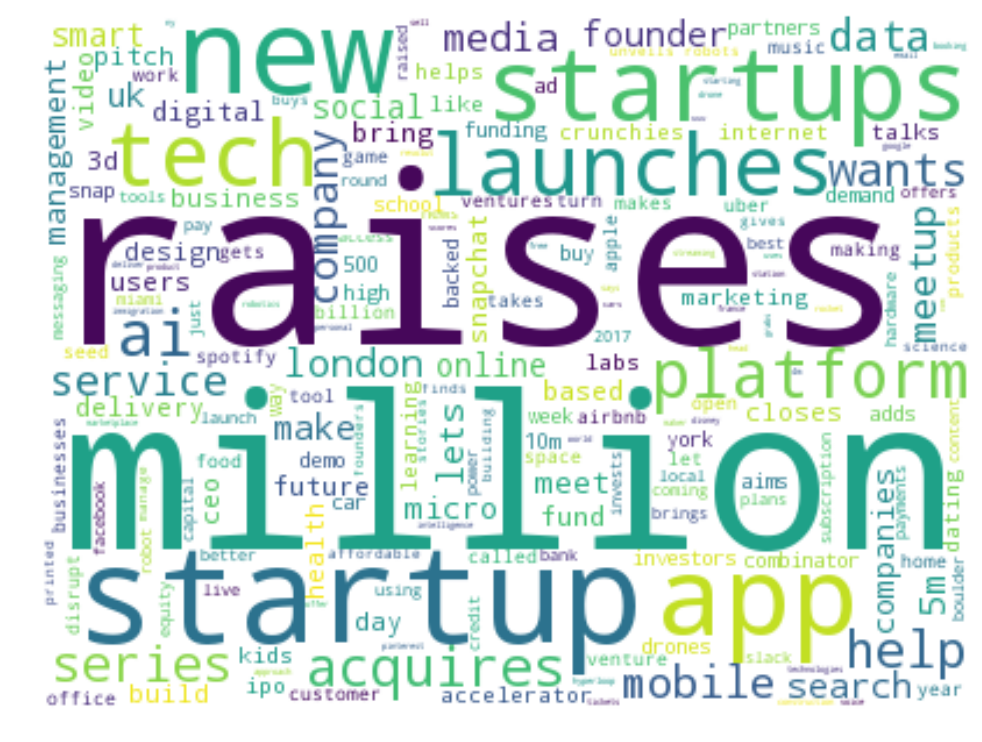

In [31]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

## 상관 행렬 (correlation matrix)

In [37]:
word_corr = numpy.corrcoef(tdm.todense(), rowvar=0)
word_corr

array([[ 1.        , -0.00386403, -0.00386403, ..., -0.00273   ,
        -0.00273   , -0.00273   ],
       [-0.00386403,  1.        , -0.00334448, ..., -0.00236293,
        -0.00236293, -0.00236293],
       [-0.00386403, -0.00334448,  1.        , ..., -0.00236293,
        -0.00236293, -0.00236293],
       ..., 
       [-0.00273   , -0.00236293, -0.00236293, ...,  1.        ,
        -0.00166945, -0.00166945],
       [-0.00273   , -0.00236293, -0.00236293, ..., -0.00166945,
         1.        , -0.00166945],
       [-0.00273   , -0.00236293, -0.00236293, ..., -0.00166945,
        -0.00166945,  1.        ]])

In [66]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        if (words[i][0] == 'e'):       # e로 시작하는 단어들만...
            edges.append((words[i], words[j], word_corr[i, j]))

In [67]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [68]:
edges = edges[:30]
edges

[('easier', 'kudi', 1.0),
 ('easier', 'places', 1.0),
 ('easiest', 'reps', 1.0),
 ('easilydo', 'powerful', 1.0),
 ('echo', 'reckoning', 1.0),
 ('echo', 'rob', 1.0),
 ('editor', 'shutterstock', 1.0),
 ('editor', 'unstock', 1.0),
 ('educator', 'entrepreneur', 1.0),
 ('einstein', 'familiar', 1.0),
 ('einstein', 'professor', 1.0),
 ('eligible', 'upend', 1.0),
 ('eloquent', 'fix', 1.0),
 ('eloquent', 'turk', 1.0),
 ('employees', 'fluent', 1.0),
 ('employees', 'lingo', 1.0),
 ('employs', 'propulse', 1.0),
 ('employs', 'recommendations', 1.0),
 ('enabled', 'soundhound', 1.0),
 ('encourages', 'processing', 1.0),
 ('encrypted', 'signal', 1.0),
 ('energy', 'safety', 1.0),
 ('energy', 'worker', 1.0),
 ('engagement', 'localytics', 1.0),
 ('engagement', 'tapglue', 1.0),
 ('engineer', 'repeated', 1.0),
 ('engineers', 'special', 1.0),
 ('enlists', 'fe', 1.0),
 ('enlists', 'recycling', 1.0),
 ('enlists', 'rubicon', 1.0)]

In [69]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
edge_list

[('easier', 'kudi'),
 ('easier', 'places'),
 ('easiest', 'reps'),
 ('easilydo', 'powerful'),
 ('echo', 'reckoning'),
 ('echo', 'rob'),
 ('editor', 'shutterstock'),
 ('editor', 'unstock'),
 ('educator', 'entrepreneur'),
 ('einstein', 'familiar'),
 ('einstein', 'professor'),
 ('eligible', 'upend'),
 ('eloquent', 'fix'),
 ('eloquent', 'turk'),
 ('employees', 'fluent'),
 ('employees', 'lingo'),
 ('employs', 'propulse'),
 ('employs', 'recommendations'),
 ('enabled', 'soundhound'),
 ('encourages', 'processing'),
 ('encrypted', 'signal'),
 ('energy', 'safety'),
 ('energy', 'worker'),
 ('engagement', 'localytics'),
 ('engagement', 'tapglue'),
 ('engineer', 'repeated'),
 ('engineers', 'special'),
 ('enlists', 'fe'),
 ('enlists', 'recycling'),
 ('enlists', 'rubicon')]

In [70]:
weight_list = [weight for word1, word2, weight in edges]
weight_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [71]:
import networkx

In [72]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

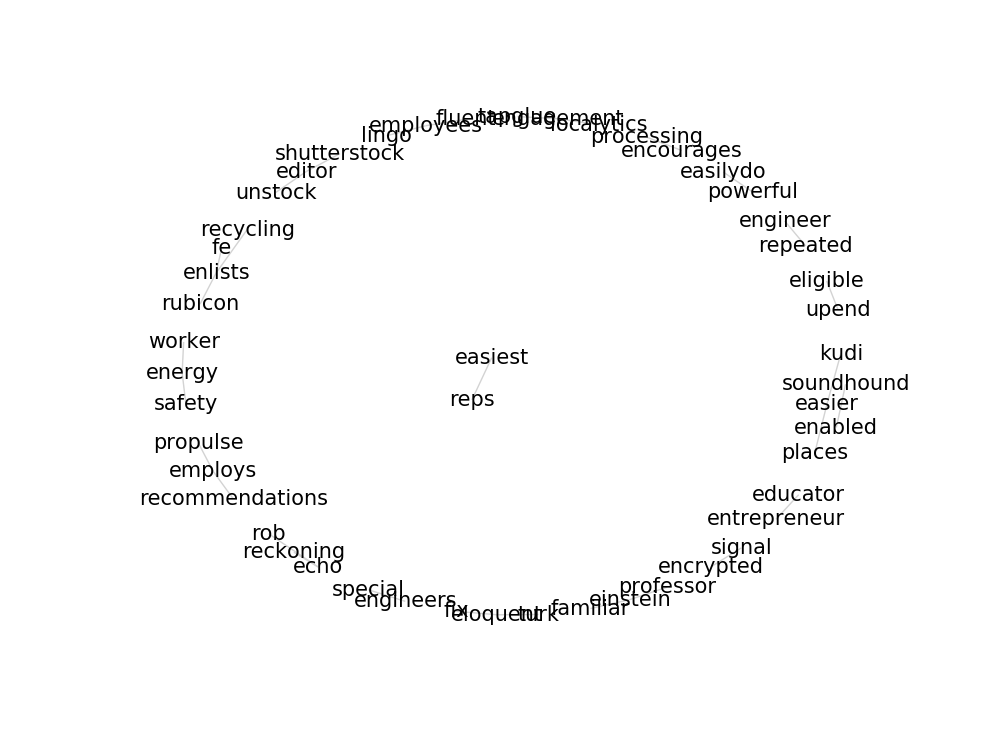

In [73]:
position = networkx.spring_layout(G, k=0.09,  iterations=100)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15)
pyplot.axis('off')
pyplot.show()